In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [17]:
df=pd.read_csv("/TelcoCustomerChurn.csv")
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-

In [18]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)
df.drop("customerID", axis=1, inplace=True)

In [19]:
cat_cols=df.select_dtypes(include="object").columns
label=LabelEncoder()
for col in cat_cols:
  df[col]=label.fit_transform(df[col])
y=df["Churn"]
X=df.drop("Churn",axis=1)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [34]:
models={
    "LogisticRegression":LogisticRegression(max_iter=500),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "Naive Bayes":GaussianNB(),
    "SVM":SVC(probability=True)
}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    results.append([name, acc, roc])


In [35]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC_AUC"])
print(results_df)


                    Model  Accuracy   ROC_AUC
0      LogisticRegression  0.782516  0.830552
1  DecisionTreeClassifier  0.719261  0.654891
2  RandomForestClassifier  0.792466  0.814871
3             Naive Bayes  0.739161  0.813088
4                     SVM  0.734186  0.788889



Best Model Based on ROC AUC: LogisticRegression


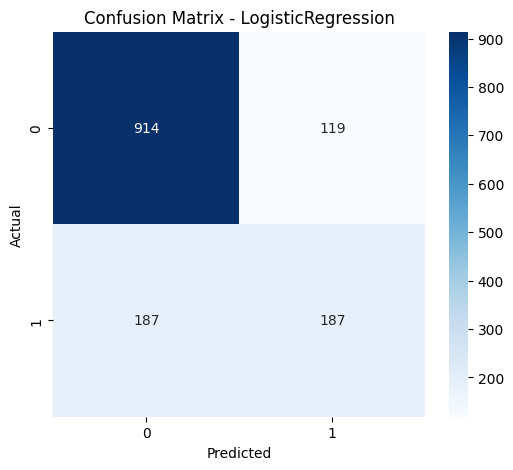

In [41]:
best_model_name = results_df.loc[results_df["ROC_AUC"].idxmax(), "Model"]
best_model = models[best_model_name]

print("\nBest Model Based on ROC AUC:", best_model_name)

pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - " + best_model_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


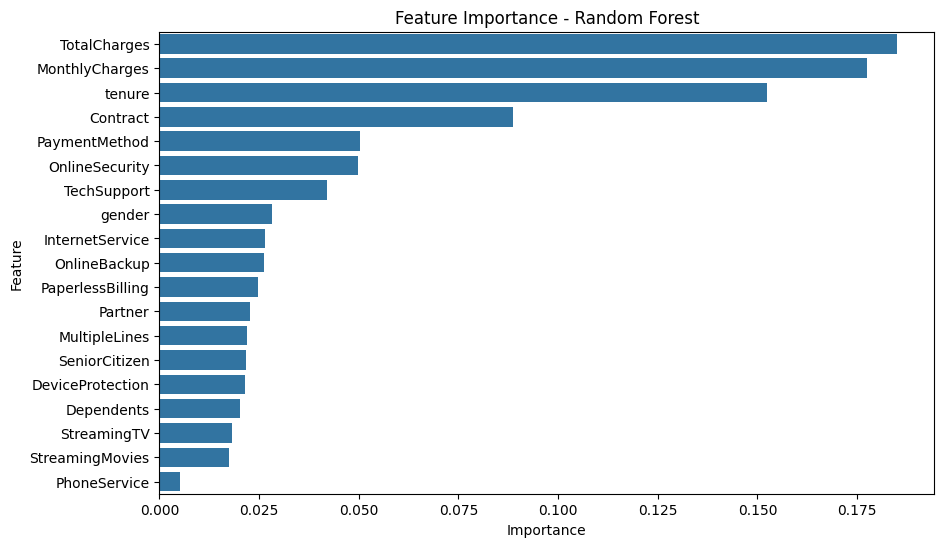

In [43]:
rf = models["RandomForestClassifier"]
importances = rf.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance - Random Forest")
plt.show()
